In [43]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [44]:
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [45]:
!pip install matplotlib-venn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [46]:
# Importing the libraries
import os
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

from keras_tuner.tuners import RandomSearch
%matplotlib inline

In [47]:
os.listdir()

['.config',
 'untitled_project',
 'Churn_Modelling.csv',
 'Weights',
 'sample_data']

In [48]:
df = pd.read_csv('Churn_Modelling.csv')

In [49]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [50]:
df = df.drop(columns=['RowNumber','CustomerId','Surname'],axis=1)

In [51]:
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [52]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [53]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [54]:
## One hot encoding on Gender and Geography
df=pd.get_dummies(df,columns=['Gender'])

In [55]:
df=pd.get_dummies(df,columns=['Geography'])
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1,1,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1,1,0,0
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,1,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,1,0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Gender_Female      10000 non-null  uint8  
 10  Gender_Male        10000 non-null  uint8  
 11  Geography_France   10000 non-null  uint8  
 12  Geography_Germany  10000 non-null  uint8  
 13  Geography_Spain    10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(5)
memory usage: 752.1 KB


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Gender_Female      10000 non-null  uint8  
 10  Gender_Male        10000 non-null  uint8  
 11  Geography_France   10000 non-null  uint8  
 12  Geography_Germany  10000 non-null  uint8  
 13  Geography_Spain    10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(5)
memory usage: 752.1 KB


In [58]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.454300,0.545700,0.501400,0.250900,0.247700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.497932,0.497932,0.500023,0.433553,0.431698
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
## Splitting the data
train,test = train_test_split(df,test_size=0.2,random_state=64)
train.shape,test.shape

((8000, 14), (2000, 14))

In [60]:
## Normalization of data
normalize_tr,normalize_ts = MinMaxScaler(),MinMaxScaler()

tr_scaled = pd.DataFrame(normalize_tr.fit_transform(train),columns=train.columns)
ts_scaled = pd.DataFrame(normalize_ts.fit_transform(test),columns=test.columns)

display(tr_scaled)
display(ts_scaled)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,0.442,0.391892,0.7,0.000000,0.333333,0.0,0.0,0.561831,0.0,1.0,0.0,1.0,0.0,0.0
1,0.358,0.216216,0.9,0.000000,0.000000,1.0,1.0,0.466028,0.0,0.0,1.0,0.0,0.0,1.0
2,0.612,0.364865,0.7,0.581644,0.000000,1.0,1.0,0.996998,0.0,1.0,0.0,1.0,0.0,0.0
3,0.854,0.148649,0.9,0.523083,0.000000,1.0,1.0,0.818751,1.0,1.0,0.0,1.0,0.0,0.0
4,0.848,0.243243,0.9,0.521366,0.000000,1.0,0.0,0.761466,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.502,0.324324,0.1,0.392573,0.000000,1.0,0.0,0.200035,1.0,0.0,1.0,0.0,1.0,0.0
7996,0.650,0.486486,0.6,0.000000,0.000000,1.0,0.0,0.551364,1.0,0.0,1.0,1.0,0.0,0.0
7997,0.190,0.256757,0.3,0.000000,0.333333,1.0,1.0,0.900090,0.0,0.0,1.0,1.0,0.0,0.0
7998,0.520,0.256757,0.0,0.000000,0.000000,1.0,0.0,0.572570,0.0,0.0,1.0,1.0,0.0,0.0


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,0.474,0.587302,0.9,0.000000,0.000000,1.0,0.0,0.322775,0.0,0.0,1.0,1.0,0.0,0.0
1,0.670,0.396825,0.9,0.000000,0.333333,1.0,0.0,0.539040,0.0,0.0,1.0,0.0,0.0,1.0
2,0.884,0.015873,0.7,0.673897,0.000000,1.0,0.0,0.166097,0.0,0.0,1.0,1.0,0.0,0.0
3,0.858,0.349206,0.2,0.354690,0.000000,1.0,1.0,0.264232,0.0,1.0,0.0,0.0,1.0,0.0
4,0.994,0.761905,0.7,0.581642,0.000000,0.0,1.0,0.265549,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.820,0.301587,0.7,0.000000,0.000000,0.0,0.0,0.163998,1.0,0.0,1.0,1.0,0.0,0.0
1996,0.730,0.428571,0.4,0.000000,0.333333,1.0,1.0,0.274991,0.0,0.0,1.0,1.0,0.0,0.0
1997,0.654,0.396825,0.3,0.626074,0.333333,1.0,1.0,0.479620,0.0,1.0,0.0,0.0,0.0,1.0
1998,0.848,0.285714,0.8,0.550584,0.000000,0.0,0.0,0.509101,0.0,1.0,0.0,0.0,0.0,1.0


In [61]:
x_train, y_train = tr_scaled.drop(columns = ['Exited']), tr_scaled[['Exited']]
x_test, y_test = ts_scaled.drop(columns = ['Exited']), ts_scaled[['Exited']]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((8000, 13), (8000, 1), (2000, 13), (2000, 1))

In [62]:
# Generating the basic structure

model = tf.keras.Sequential()

# adding the input layer
model.add(tf.keras.layers.Input(shape=(13,)))

# adding hidden layers
# hidden layer I
model.add(tf.keras.layers.Dense(units=6,
                                activation='relu',
                                kernel_initializer='he_normal'))

# Hidden layer II
model.add(tf.keras.layers.Dense(units=10,
                                activation='relu',
                                kernel_initializer='he_normal'))


# Hidden layer III
model.add(tf.keras.layers.Dense(units=12,
                                activation='relu',
                                kernel_initializer='he_normal'))


# Adding the output layer 
model.add(tf.keras.layers.Dense(units=1,
                                activation='sigmoid',
                                kernel_initializer='glorot_normal'))

# compiling the model 
model.compile(optimizer = 'Adam',
              loss='binary_crossentropy',
              metrics=['accuracy','Precision','Recall'])

In [63]:
 # summerizing the model
 model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 6)                 84        
                                                                 
 dense_8 (Dense)             (None, 10)                70        
                                                                 
 dense_9 (Dense)             (None, 12)                132       
                                                                 
 dense_10 (Dense)            (None, 1)                 13        
                                                                 
Total params: 299
Trainable params: 299
Non-trainable params: 0
_________________________________________________________________


In [64]:
# training the model
hist_obj= model.fit(x=x_train,y=y_train,
                    batch_size = 512, epochs=100,
                    validation_data=(x_test,y_test),
                    validation_batch_size=512,
                    use_multiprocessing=True,
                    workers=20)

Epoch 1/100
16/16 [==============================] - 2s 51ms/step - loss: 0.5899 - accuracy: 0.7945 - precision: 1.0000 - recall: 6.0790e-04 - val_loss: 0.5601 - val_accuracy: 0.8040 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/100
16/16 [==============================] - 0s 7ms/step - loss: 0.5539 - accuracy: 0.7944 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5274 - val_accuracy: 0.8040 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/100
16/16 [==============================] - 0s 6ms/step - loss: 0.5306 - accuracy: 0.7944 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5091 - val_accuracy: 0.8040 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/100
16/16 [==============================] - 0s 5ms/step - loss: 0.5200 - accuracy: 0.7944 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4999 - val_accuracy: 0.8040 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/100
16/16 [============================

In [65]:
type(hist_obj)

keras.callbacks.History

In [66]:
dir(hist_obj)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_chief_worker_only',
 '_implements_predict_batch_hooks',
 '_implements_test_batch_hooks',
 '_implements_train_batch_hooks',
 '_keras_api_names',
 '_keras_api_names_v1',
 '_supports_tf_logs',
 'epoch',
 'history',
 'model',
 'on_batch_begin',
 'on_batch_end',
 'on_epoch_begin',
 'on_epoch_end',
 'on_predict_batch_begin',
 'on_predict_batch_end',
 'on_predict_begin',
 'on_predict_end',
 'on_test_batch_begin',
 'on_test_batch_end',
 'on_test_begin',
 'on_test_end',
 'on_train_batch_begin',
 'on_train_batch_end',
 'on_train_begin',
 'on_train_end',
 'params',
 'set_model',
 'set_params',
 'validation_data']

In [67]:
# Fetching the required data from history obj

def visualizer(hist_obj, parameter):
  plt.figure(figsize = (24,10))

  train_param = hist_obj.history.get(parameter)
  val_param = hist_obj.history.get(f'val_{parameter}')
  epochs = hist_obj.epoch

  sns.lineplot(x = epochs, y = train_param)
  sns.lineplot(x = epochs, y = val_param )

  plt.legend(labels = [parameter, f'val_{parameter}'])
  plt.xticks(ticks = epochs, labels = epochs, rotation = 45)
  plt.yticks(ticks = [i/100 for i in range(10,110,10)], labels = [i/100 for i in range(10,110,10)] )
  plt.show()

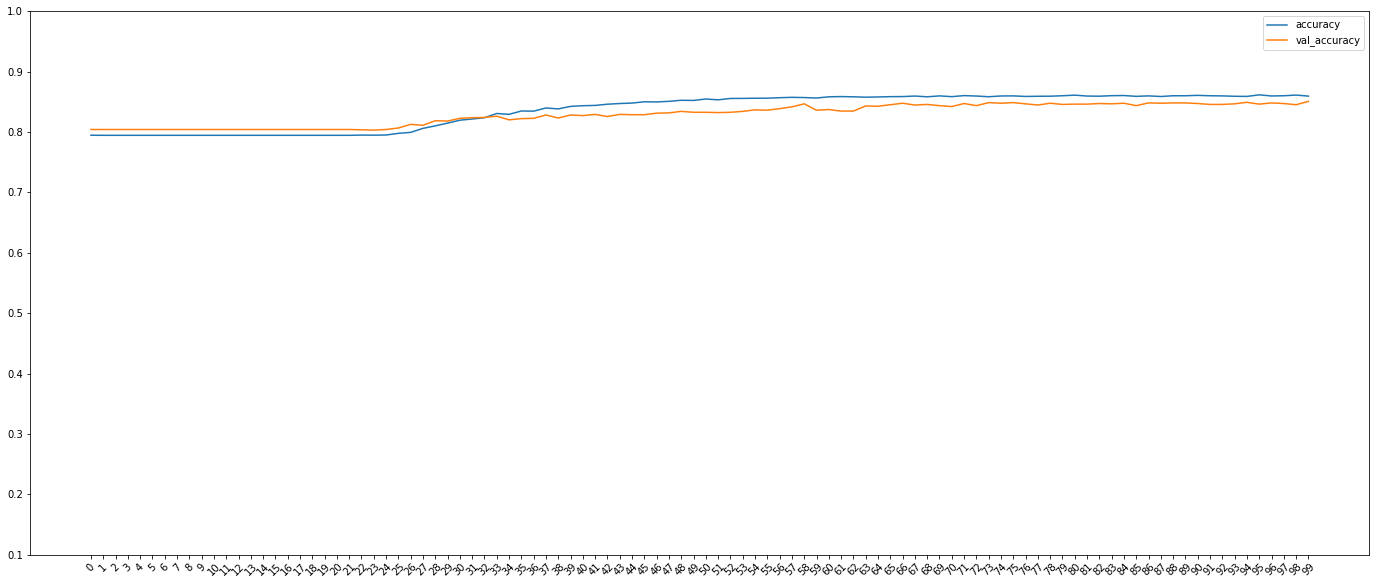

In [68]:
visualizer(hist_obj,'accuracy')

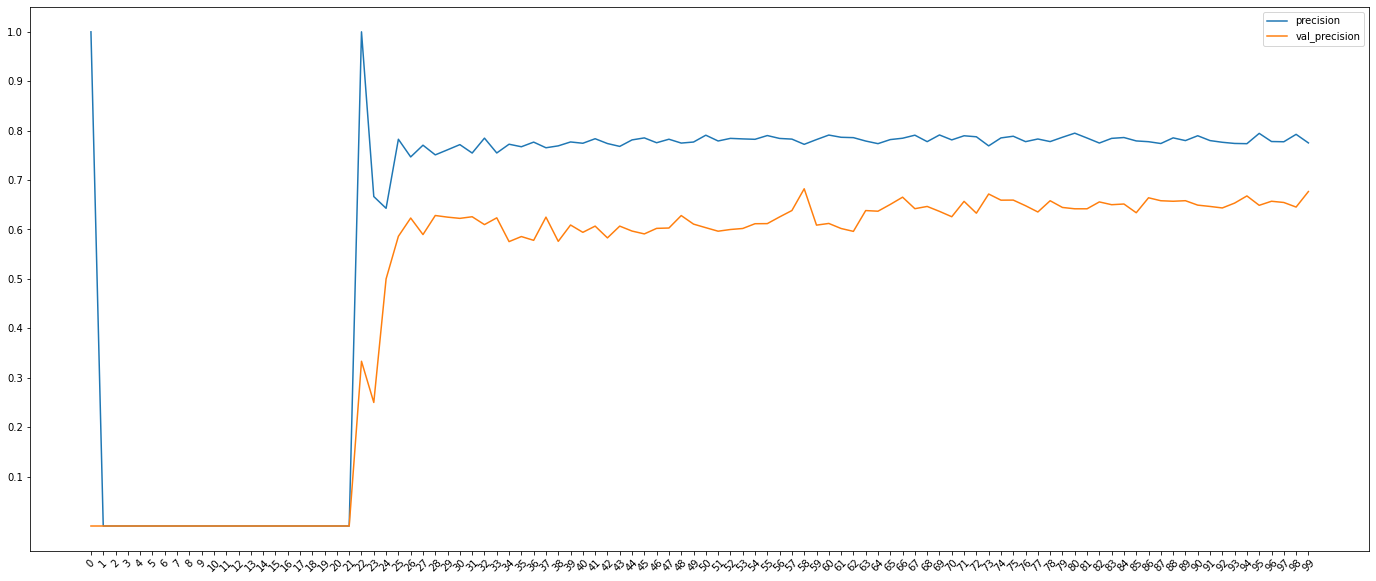

In [69]:
visualizer(hist_obj,'precision')

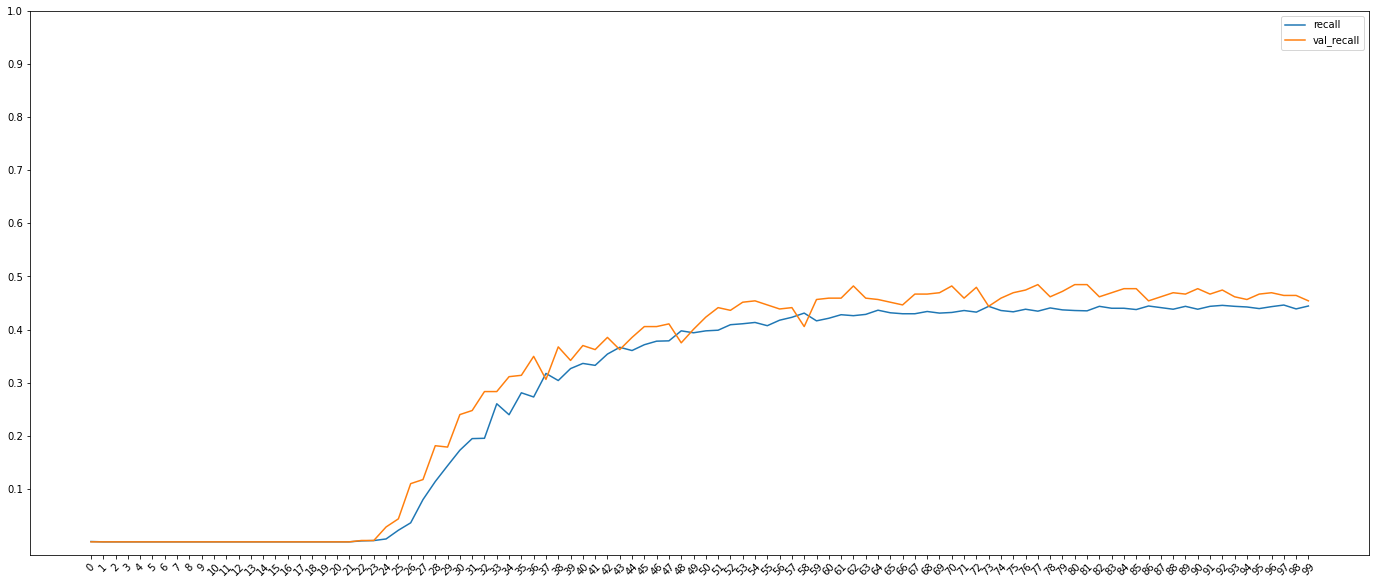

In [70]:
visualizer(hist_obj, 'recall')

# Early stopping


In [71]:
early_stopper = EarlyStopping(monitor = 'accuracy', patience = 10)

In [72]:
hist_obj2 = model.fit(x = x_train,y=y_train,
                      batch_size = 512,
                      epochs=100,
                      validation_data =(x_test,y_test),
                      validation_batch_size =512,
                      workers=20,
                      callbacks=[early_stopper])

Epoch 1/100
16/16 [==============================] - 0s 7ms/step - loss: 0.3475 - accuracy: 0.8594 - precision: 0.7760 - recall: 0.4444 - val_loss: 0.3586 - val_accuracy: 0.8470 - val_precision: 0.6581 - val_recall: 0.4566
Epoch 2/100
16/16 [==============================] - 0s 4ms/step - loss: 0.3474 - accuracy: 0.8601 - precision: 0.7865 - recall: 0.4389 - val_loss: 0.3698 - val_accuracy: 0.8410 - val_precision: 0.6209 - val_recall: 0.4847
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 0.3471 - accuracy: 0.8602 - precision: 0.7855 - recall: 0.4407 - val_loss: 0.3636 - val_accuracy: 0.8455 - val_precision: 0.6446 - val_recall: 0.4719
Epoch 4/100
16/16 [==============================] - 0s 4ms/step - loss: 0.3471 - accuracy: 0.8594 - precision: 0.7737 - recall: 0.4468 - val_loss: 0.3624 - val_accuracy: 0.8465 - val_precision: 0.6491 - val_recall: 0.4719
Epoch 5/100
16/16 [==============================] - 0s 5ms/step - loss: 0.3466 - accuracy: 0.8611 - precisi

## Hyperparameter

### Hyperparameter.Choice(list_of_elements)

# 2 Hyperparameter.Int(range_of_element)

In [73]:
def hypermodel(hyp):
  model = tf.keras.Sequential()

  # adding the input layer
  model.add(tf.keras.layers.Input(shape = (13,)))

  # adding the hidden layers
  for layer_num in range(hyp.Int('number of hidden layers', min_value = 1, max_value = 18)):
    model.add(tf.keras.layers.Dense(units = hyp.Int(f'number of neuron in layer {layer_num}', min_value = 4, max_value =20, step = 4),
                                    activation = hyp.Choice(f'Activation function in layer {layer_num}', ['sigmoid','relu']),
                                    kernel_initializer = hyp.Choice(f'kerenel initializer use in layer {layer_num}',['he_normal','he_uniform','glorot_normal', 'glorot_uniform'])))
    
  # adding the out put layer 
  model.add(tf.keras.layers.Dense(units = 1,
                                  activation = 'sigmoid',
                                  kernel_initializer = hyp.Choice('kerenel initializer use in out put layer',['he_normal','he_uniform','glorot_normal', 'glorot_uniform'])))
  
  # compiling the model
  model.compile(optimizer = 'Adam',
                loss = 'binary_crossentropy',
                metrics = ['accuracy','Precision', 'Recall'])
  
  return model 

In [74]:
# Generating the tuner object

tuner = RandomSearch(hypermodel=hypermodel, objective='accuracy')

In [75]:
# Summarizing the tuner object
tuner.search_space_summary()

Search space summary
Default search space size: 50
number of hidden layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 18, 'step': 1, 'sampling': 'linear'}
number of neuron in layer 0 (Int)
{'default': None, 'conditions': [], 'min_value': 4, 'max_value': 20, 'step': 4, 'sampling': 'linear'}
Activation function in layer 0 (Choice)
{'default': 'sigmoid', 'conditions': [], 'values': ['sigmoid', 'relu'], 'ordered': False}
kerenel initializer use in layer 0 (Choice)
{'default': 'he_normal', 'conditions': [], 'values': ['he_normal', 'he_uniform', 'glorot_normal', 'glorot_uniform'], 'ordered': False}
kerenel initializer use in out put layer (Choice)
{'default': 'he_normal', 'conditions': [], 'values': ['he_normal', 'he_uniform', 'glorot_normal', 'glorot_uniform'], 'ordered': False}
number of neuron in layer 1 (Int)
{'default': None, 'conditions': [], 'min_value': 4, 'max_value': 20, 'step': 4, 'sampling': 'linear'}
Activation function in layer 1 (Choice)
{'default':

In [76]:
# tunning the model
tuner.search(x_train,y_train,epochs=100,batch_size=512)

In [77]:
# fetching the best model from tuned object
best_model = tuner.get_best_models()[0]

In [78]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 112       
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 12)                108       
                                                                 
 dense_3 (Dense)             (None, 16)                208       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 8)                 72        
                                                                 
 dense_6 (Dense)             (None, 8)                 7

In [79]:
# saving the model
# creating  the new directory for model weights
model_weights_dir ='Weights'
os.makedirs(model_weights_dir,exist_ok=True)

# saving the model weights

best_model.save(os.path.join(model_weights_dir,'Best_model.tf'),save_format='tf')

In [80]:
#Loading the model

loaded_model = tf.keras.models.load_model(os.path.join(model_weights_dir,'Best_model.tf'))

In [81]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 112       
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 12)                108       
                                                                 
 dense_3 (Dense)             (None, 16)                208       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 8)                 72        
                                                                 
 dense_6 (Dense)             (None, 8)                 7

In [82]:
dir(loaded_model)

['_SCALAR_UPRANKING_ON',
 '_TF_MODULE_IGNORED_PROPERTIES',
 '__call__',
 '__class__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_activity_regularizer',
 '_add_trackable',
 '_add_trackable_child',
 '_add_variable_with_custom_getter',
 '_assert_compile_was_called',
 '_assert_weights_created',
 '_auto_track_sub_layers',
 '_autocast',
 '_autographed_call',
 '_base_model_initialized',
 '_build_graph_network_for_inferred_shape',
 '_build_input_shape',
 '_call_accepts_kwargs',
 '_call_arg_was_passed',
 '_call_fn_arg_defaults',
 '_call_fn_arg_positions',
 '_call_fn_args',
 '_call_full_argspec',
 '_callable_losses',
 '_ca

In [83]:
# Loaded model Evaluation
evaluation = loaded_model.evaluate(x=x_test,y=y_test,batch_size=512)

4/4 [==============================] - 1s 7ms/step - loss: 0.3626 - accuracy: 0.8425 - precision: 0.6199 - recall: 0.5077


In [84]:
y_pred = loaded_model.predict(x_test)
y_pred

63/63 [==============================] - 0s 2ms/step


array([[0.8734442 ],
       [0.12031926],
       [0.02561532],
       ...,
       [0.30066648],
       [0.15730964],
       [0.12809975]], dtype=float32)

In [85]:
y_pred =list(map(int,y_pred>0.50))
y_pred

[1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
